
# Project: Investigate No-show appointments Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
There are alot of questions which can be asked to explore the relationship between each characteristic and No-show result, some of them are:
- Is the age of the patient has an effect in absence at the appointment? <br>
- Does the increasing in number of days between the scheduling and appointment increases the probability of no show? <br>
- Do the patients with scholarship miss the appointment more than who doesn't have it? <br>
- Is receiving an SMS before the appointment really encourage the patient to show up to their appointment? <br>
- Does the number of medical situations make the patient more commitment to his/her appointment? <br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_theme()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

Check if there is duplicated rows

In [5]:
df.duplicated().sum()

0

Drop appointment id column because it has no useful information for this investigation

In [6]:
df.drop(['AppointmentID'],axis = 1,inplace = True)

Convert scheduled day and appointment day column type from string to date time object and then get the date only 

In [7]:
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'],format="%Y-%m-%dT%H:%M:%SZ")

In [8]:
df['ScheduledDay'] = df['ScheduledDay'].dt.date

In [9]:
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'],format="%Y-%m-%dT%H:%M:%SZ")

In [10]:
df['AppointmentDay'] = df['AppointmentDay'].dt.date

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   Gender          110527 non-null  object 
 2   ScheduledDay    110527 non-null  object 
 3   AppointmentDay  110527 non-null  object 
 4   Age             110527 non-null  int64  
 5   Neighbourhood   110527 non-null  object 
 6   Scholarship     110527 non-null  int64  
 7   Hipertension    110527 non-null  int64  
 8   Diabetes        110527 non-null  int64  
 9   Alcoholism      110527 non-null  int64  
 10  Handcap         110527 non-null  int64  
 11  SMS_received    110527 non-null  int64  
 12  No-show         110527 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usage: 11.0+ MB


Replace scheduled day and appointment day columns by the difference in days between them 

In [12]:
df['days_between_scheduling_and_appointment'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [13]:
df.drop(['ScheduledDay','AppointmentDay'],axis = 1,inplace = True)

Add a new column which conatins the total number of medical situations the pateint has

In [14]:
df['number_of_medical_situations'] = df['Hipertension'] + df['Diabetes'] + df['Alcoholism']

In [15]:
df.head()

,PatientId,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days_between_scheduling_and_appointment,number_of_medical_situations
0,2.987250e+13,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,1
1,5.589978e+14,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,0
2,4.262962e+12,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,0
3,8.679512e+11,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,0
4,8.841186e+12,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,2


<a id='eda'></a>
## Exploratory Data Analysis

### Is the age of the patient has an effect in absence at the appointment?

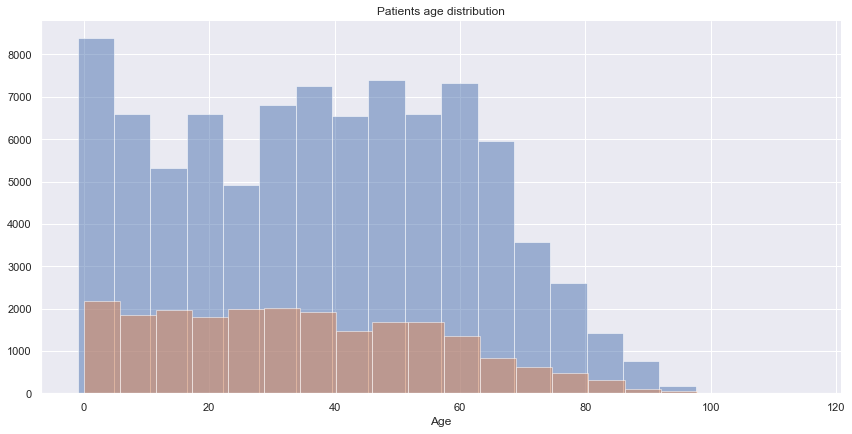

In [16]:
g = sns.FacetGrid(df, hue = 'No-show', size = 6, aspect = 2)
g = g.map(plt.hist, 'Age', bins = 20, alpha = 0.5)
plt.title("Patients age distribution");

There is a wide range of patients ages.

,mean,std
No-show,,
No,37.790064,23.338878
Yes,34.317667,21.965941


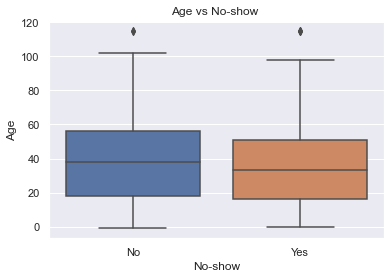

In [17]:
sns.boxplot('No-show','Age',data = df);
plt.title('Age vs No-show ')
pd.DataFrame(df.groupby(['No-show'])['Age'].describe().loc[:,['mean','std']])


Age Box plots shows that patients who don't show up at their appointments have a slight larger mean age and standard deviation than who show up 

### Does the increasing in number of days between the scheduling and appointment increases the probability of no show?

Number of days can have a significant effect on weather the patient will show up or not, some patients get healed before the appointment so they don't show up at their appointment

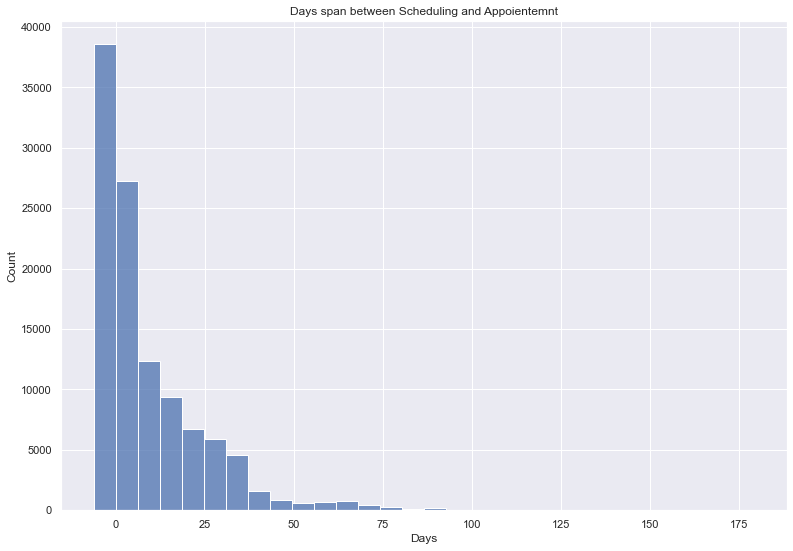

In [18]:
plt.figure(figsize = [13,9])
sns.histplot(df['days_between_scheduling_and_appointment'],bins = 30)
plt.xlabel('Days');
plt.title('Days span between Scheduling and Appoientemnt');

Its right skewed distribution, which means that most of the appoinments are not too faraway from the scheduling 

,mean,std
No-show,,
No,8.754659,14.550398
Yes,15.831489,16.605912


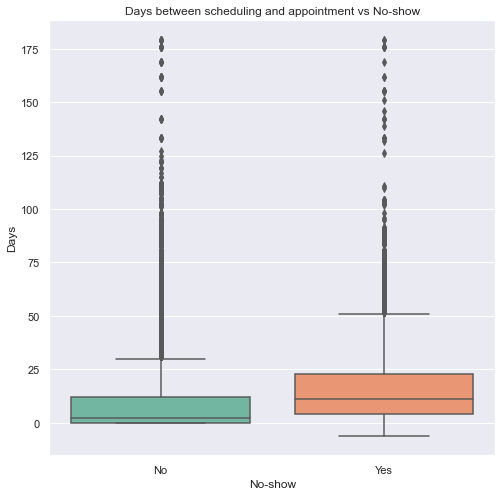

In [19]:
plt.figure(figsize = [8,8])
sns.boxplot('No-show','days_between_scheduling_and_appointment',data = df,palette = "Set2")
plt.title("Days between scheduling and appointment vs No-show")
plt.ylabel('Days')
pd.DataFrame(df.groupby(['No-show'])['days_between_scheduling_and_appointment'].describe().loc[:,['mean','std']])

The box plot shows that patients who missed their appointments has larger mean value of days between scheduling and appointments

### Do the patients with scholarship miss the appointment more than who doesn't have it?

Scholarship encourage people to show up at their appointments because they don't have to pay as much as people without scholarship

Scholarship
0    99666
1    10861
Name: PatientId, dtype: int64

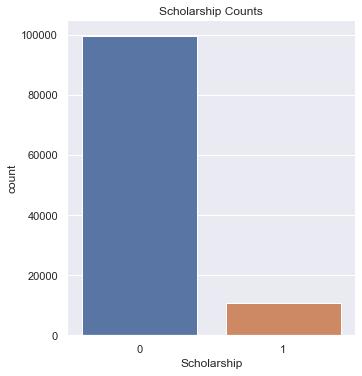

In [20]:
sns.catplot(x="Scholarship",kind = 'count',data=df);
plt.title('Scholarship Counts')
df.groupby('Scholarship')['PatientId'].count()

PatientId
Scholarship No-show           
0           No           79925
            Yes          19741
1           No            8283
            Yes           2578

<Figure size 720x648 with 0 Axes>

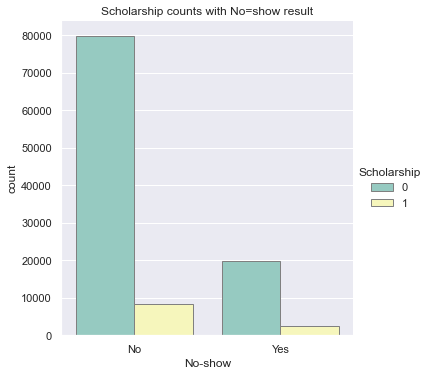

In [21]:
plt.figure(figsize = [10,9])
sns.catplot(hue="Scholarship", x="No-show", kind="count",palette="Set3", edgecolor="0.5",data=df)
plt.title('Scholarship counts with No=show result')
df.groupby(['Scholarship','No-show']).count().loc[:,['PatientId']]

In [22]:
print("Percentage of patients who doesn't have a scholarship and didn't show up = ",df[(df['Scholarship']== 0) & (df['No-show']== 'Yes')].value_counts().sum()/df[df['No-show']== 'Yes'].value_counts().sum())
print("Percentage of patients who has a scholarship and didn't show up = ",df[(df['Scholarship']== 1) & (df['No-show']== 'Yes')].value_counts().sum()/df[df['No-show']== 'Yes'].value_counts().sum())
print("Percentage of patients who doesn't have a scholarship and showed up = ",df[(df['Scholarship']== 0) & (df['No-show']== 'No')].value_counts().sum()/df[df['No-show']== 'No'].value_counts().sum())
print("Percentage of patients who has a scholarship and showed up = ",df[(df['Scholarship']== 1) & (df['No-show']== 'No')].value_counts().sum()/df[df['No-show']== 'No'].value_counts().sum())

Percentage of patients who doesn't have a scholarship and didn't show up =  0.8844930328419732
Percentage of patients who has a scholarship and didn't show up =  0.11550696715802679
Percentage of patients who doesn't have a scholarship and showed up =  0.9060969526573553
Percentage of patients who has a scholarship and showed up =  0.09390304734264465


### Is receiving an SMS before the appointment really encourage the patient to show up to their appointment?

SMS can remind pateint of their appoientments so the pateint will not miss it

SMS_received
0    75045
1    35482
Name: PatientId, dtype: int64

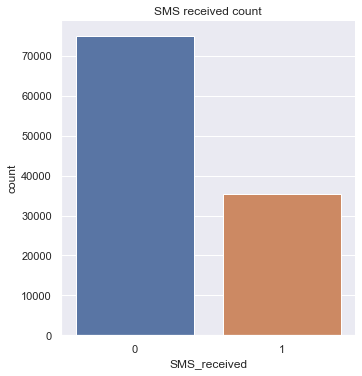

In [23]:
sns.catplot(x="SMS_received",kind = 'count',data=df);
plt.title('SMS received count');
df.groupby('SMS_received')['PatientId'].count()

PatientId
SMS_received No-show           
0            No           62510
             Yes          12535
1            No           25698
             Yes           9784

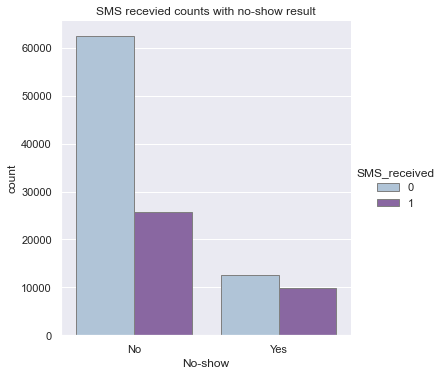

In [24]:
sns.catplot(x="No-show", hue="SMS_received", kind="count",
            palette="BuPu", edgecolor="0.5",
            data=df)
plt.title('SMS recevied counts with no-show result')
df.groupby(['SMS_received','No-show']).count().loc[:,['PatientId']]

In [25]:
print("Percentage of patients who didn't receive an SMS and didn't show up = ",df[(df['SMS_received']== 0) & (df['No-show']== 'Yes')].value_counts().sum()/df[df['No-show']== 'Yes'].value_counts().sum())
print("Percentage of patients who received an SMS and didn't show up = ",df[(df['SMS_received']== 1) & (df['No-show']== 'Yes')].value_counts().sum()/df[df['No-show']== 'Yes'].value_counts().sum())
print("Percentage of patients who didn't receive an SMS and showed up = ",df[(df['SMS_received']== 0) & (df['No-show']== 'No')].value_counts().sum()/df[df['No-show']== 'No'].value_counts().sum())
print("Percentage of patients who received an SMS and showed up = ",df[(df['SMS_received']== 1) & (df['No-show']== 'No')].value_counts().sum()/df[df['No-show']== 'No'].value_counts().sum())

Percentage of patients who didn't receive an SMS and didn't show up =  0.5616291052466509
Percentage of patients who received an SMS and didn't show up =  0.43837089475334917
Percentage of patients who didn't receive an SMS and showed up =  0.7086658806457464
Percentage of patients who received an SMS and showed up =  0.2913341193542536


### Does the number of medical situations make the patient more commitment to his/her appointment?

Number of medical situations may affect the showing up, people with more medical situations has to be more commitment to their appointment, on the other hand some medical situations could prevent people from showing up at their appointments

number_of_medical_situations
0    85312
1    17582
2     7377
3      256
Name: PatientId, dtype: int64

<Figure size 720x720 with 0 Axes>

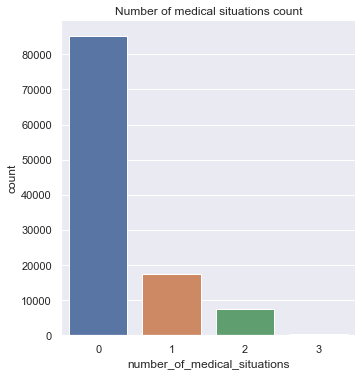

In [26]:
plt.figure(figsize = [10,10])
sns.catplot(x="number_of_medical_situations",kind = 'count',data=df);
plt.title("Number of medical situations count")
df.groupby('number_of_medical_situations')['PatientId'].count()

PatientId
number_of_medical_situations No-show           
0                            No           67474
                             Yes          17838
1                            No           14453
                             Yes           3129
2                            No            6071
                             Yes           1306
3                            No             210
                             Yes             46

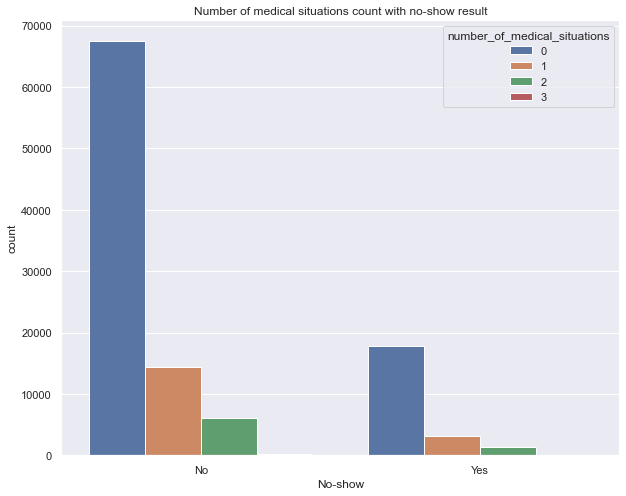

In [27]:
plt.figure(figsize = [10,8])
sns.countplot(hue='number_of_medical_situations', x='No-show', data=df)
plt.title("Number of medical situations count with no-show result")
df.groupby(['number_of_medical_situations','No-show']).count().loc[:,['PatientId']]

<a id='conclusions'></a>
## Conclusions
There are limitations that may affect the data analysis result, some of them are:

- There are many more medical situations that may affect the appearance of the patients and not included in the data<br> 
- Neighborhood name is not useful here since it has no information about if the clinic is located in the same neighborhood or how its far from it <br> 
- Some features are not distributed equally such as scholarship and gender so maybe the analysis of them give us miss leading conclusions, to overcome this issue we can treat each category individually

If we overcome the mentioned limitations we can conclude that each characteristic has a different effect on which the patient will show up at the appointment or not, these effects could be summarized as: <br>

1- Age has a slightly contribution, older people show up to their appointment more than younger ones. <br>
2- Number of days between the scheduling and appointment increases the probability of no show.<br>
3- Scholarship has almost no effect.<br>
4- About 56% of patient who didn't show up didn't receive an SMS so receiving an SMS before the appointment really encourage the patient to show up to their appointment.<br>
5- As the number of medical situations increase, the commitment to show up decreases.<br>



